### **Importing Necessary Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Challenge** 
Use features such as gender, ethinicity, parental level, lunch and test preparation course to predict the score of a student.

### Reading the data

In [5]:
df = pd.read_csv('StudentsPerformance.csv')

Have a look on the random sample of the dataset 

In [6]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
918,female,group C,associate's degree,standard,completed,57,77,80
181,female,group C,some college,free/reduced,none,46,64,66
920,male,group D,high school,free/reduced,none,69,70,67
641,female,group D,associate's degree,free/reduced,completed,74,88,90
869,male,group C,associate's degree,free/reduced,none,49,51,51
782,female,group B,high school,free/reduced,completed,76,85,82
772,female,group B,some high school,free/reduced,completed,52,67,72
690,female,group C,associate's degree,standard,none,49,53,53
487,female,group C,associate's degree,free/reduced,none,60,75,74
188,male,group B,some high school,free/reduced,none,48,52,45


In [5]:
df.shape

(1000, 8)

The data consist of 1000 rows and 8 columns.
**Not Enough** to make reliable prediction

## DataSet Imformation:
* Gender: Sex of the student(Male/female)
* race/ethinicity: Group(A,B,C,D,E)
* parental level of education: Parents highest level of education->(High school, some high school, Associate degree, Bachelor's degree, master's degree)
* lunch: having lunch before test(standard or free/reduced)
* test preparation course: Course completed or not before test
* Scores in Maths, reading and writing

### Data Checks to perform
* Check Missing values
* Check duplicates
* Check data type
* Check unique values in each column
* Check Statistics of the data set
* Check various categories present in the different categorical column

### **Missing Value Check**

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values but if there were any then we could have used simple mean imputation to fill them. Removing them will not be great idea as size of the data is small.

### **Checking for Duplicates**

In [8]:
df.duplicated().sum()

0

#### No duplicate values also if there were any then we will be removing them, no other option.

### **Checking Data Type**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### All the input columns are of object datatype and output columns are of numeric type

### Checking Number of unique values in each columns

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Checking statistics of the dataset

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
1. All the means are close to each other.
1. All the standard deviation are in rane 14-16.
1. While there is 0 as minimum in Maths but other two columns has minimum more than 10.
1. 100 is maximum score in all the three columns.
1. It can be clearly seen there are outliers in the dataset in all of these columns.

### Checking various categories present in each column

Separating categorical columns from dataset for separate analysis on them

In [12]:
cat_col = df.select_dtypes(include = 'object')

In [13]:
cat_col.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
696,female,group C,associate's degree,standard,completed
391,female,group D,some college,standard,none
308,female,group B,associate's degree,free/reduced,none
933,male,group C,bachelor's degree,free/reduced,completed
22,male,group D,some college,standard,none


In [14]:
for col in cat_col.columns:
    print(f'Different Categories in {col} are {df[col].unique()}')

Different Categories in gender are ['female' 'male']
Different Categories in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Different Categories in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Different Categories in lunch are ['standard' 'free/reduced']
Different Categories in test preparation course are ['none' 'completed']


* Column  -  Count of categories
1. Gender  -  2
1. Race    -  5
1. Parental Education level  -  6
1. Lunch   -  2
1. Test Preparation Course  -  2

#### Seprating numeric columns also for analysis purpose

In [15]:
numeric_col = df.select_dtypes(include = 'number')

In [16]:
numeric_col.sample(5)

,math score,reading score,writing score
238,54,52,51
655,62,67,67
356,63,61,61
359,80,90,89
248,65,64,62


### Adding Total score and average score columns in the dataset
Important step

In [17]:
df['total score'] = numeric_col.sum(axis = 1)
df['average score'] = np.round(numeric_col.mean(axis = 1),2)
# df['average score'] = np.round(df['total_score']/3,2)

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


#### Number of students with full marks

In [19]:
for col in numeric_col.columns:
    print(f'Number of students with full marks in {col[:-6]} are {df[df[col]==100]["average score"].count()}')

Number of students with full marks in math are 7
Number of students with full marks in reading are 17
Number of students with full marks in writing are 14


#### Number of students with less than 20 marks in amy of the three

In [20]:
for col in numeric_col.columns:
    print(f'Number of students with failing marks in {col[:-6]} are {df[df[col]<=20]["average score"].count()}')

Number of students with failing marks in math are 4
Number of students with failing marks in reading are 1
Number of students with failing marks in writing are 3


### Insights:
Students have performed worst in Maths.
Best performance is in reading section.

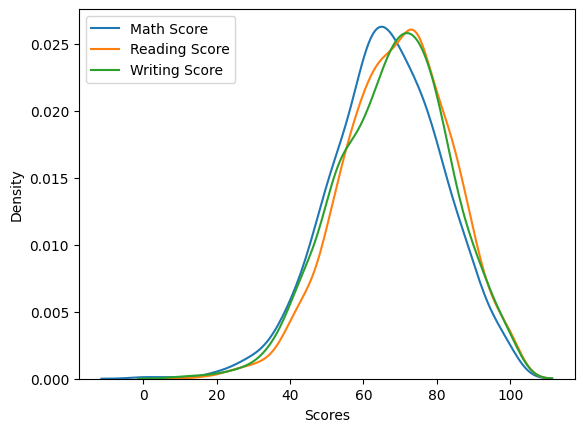

In [21]:
# plt.figure(figsize = (14,4))

# plt.subplot(121)
sns.distplot(df['math score'], hist = False, label='Math Score')
sns.distplot(df['reading score'], hist = False, label='Reading Score')
sns.distplot(df['writing score'], hist = False, label='Writing Score')

plt.xlabel('Scores')
plt.legend()
plt.show()

###  Insight:
1. The data is little bit right skewed which indicates that performance is on higher side.
1. Reading and writing scores are more related to each other.


### Let's Check average score on the basis of gender

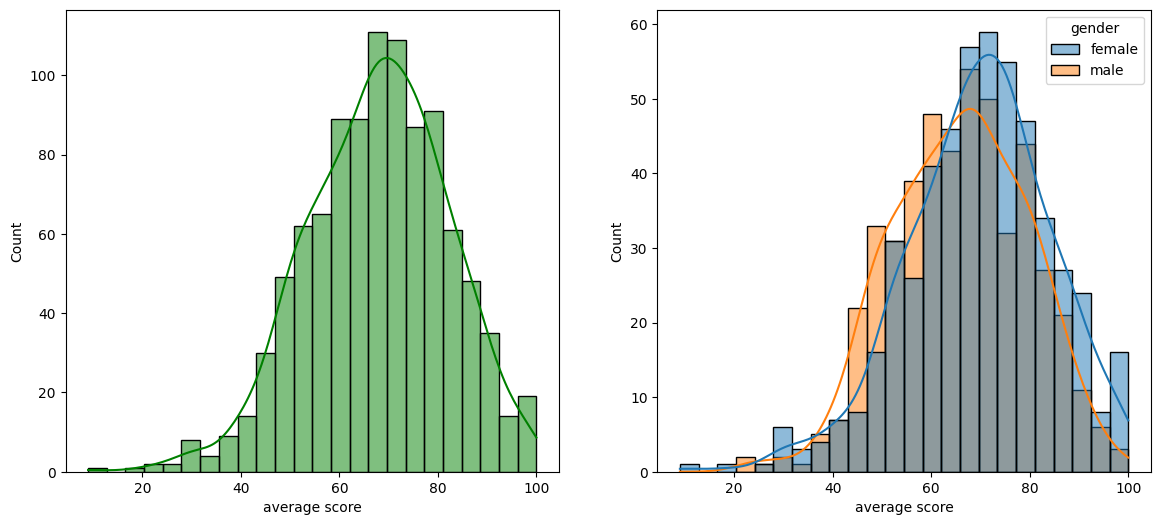

In [22]:
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', kde = True, color = 'g')

plt.subplot(122)
sns.histplot(data = df, x = 'average score',kde = True, hue = 'gender')
plt.show()
# plt.legend()

###  Insights:
1. The marks distribution is right skewed.
1. Average marks of girls are more than boys.

### Total score distribution on the basis of gender

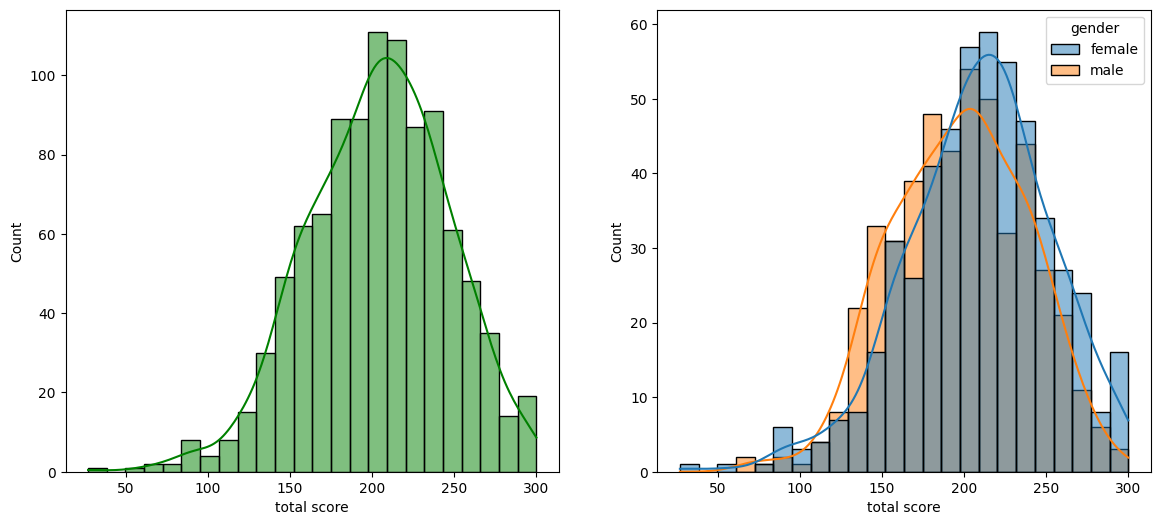

In [23]:
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', kde = True, color = 'g')

plt.subplot(122)
sns.histplot(data = df, x = 'total score',kde = True, hue = 'gender')
plt.show()

#### Here also, females are performing better than males

<Axes: xlabel='lunch', ylabel='average score'>

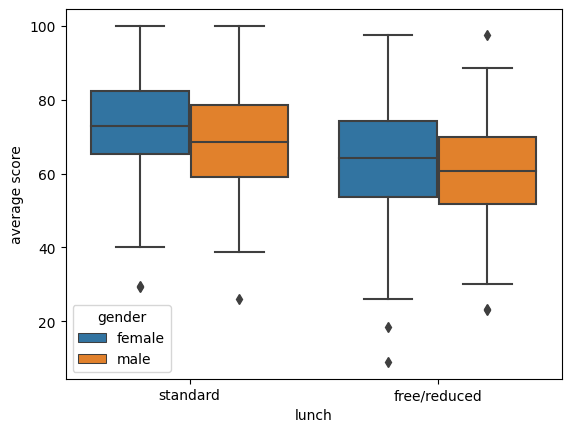

In [24]:
sns.boxplot(data = df, x = 'lunch',y = 'average score', hue = 'gender' )

#### Insights:
1. Standard lunch helps students to perform better.
1. Standard lunch helps male and females both to perform better.

Note: These type of analysis can help parents to improve their child's performance without some dwelling.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

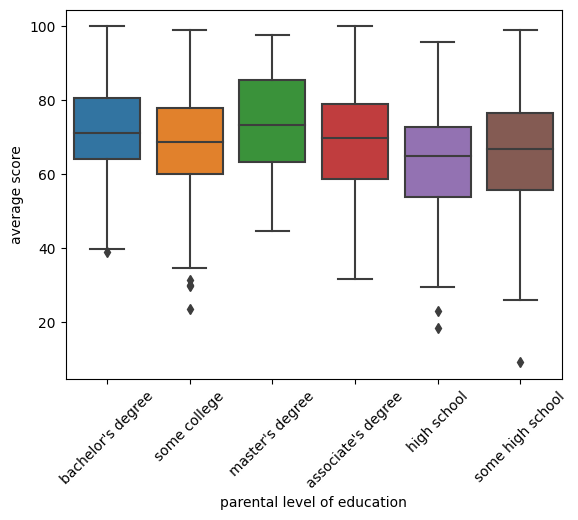

In [24]:
sns.boxplot(data = df, x = 'parental level of education', y = 'average score')
plt.xticks(rotation = 45)

#### Insights:
From above, we can say that parental level of education have not much impact on performance of child but yes their is some correlation. However there are many outliers also.

<AxesSubplot: xlabel='race/ethnicity', ylabel='average score'>

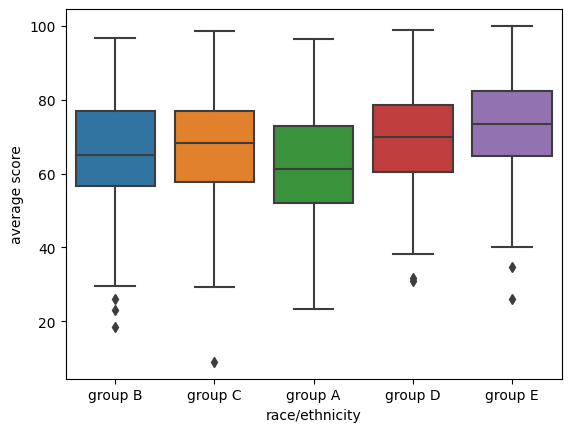

In [25]:
sns.boxplot(data = df, x = 'race/ethnicity', y = 'average score')

#### Insights:
Here we actually don't know the significance of A,B,C,D,E but yes there is some relation as ethinicity is going towards A to E the marks of student is increasing.

In [26]:
px.box(df, x = 'test preparation course', y = 'average score', color = 'gender')

#### Insights:
Females are really performing better than males. The average marks of females without completion of course is better than male who have completed the course.
😅I am sure the data is biased otherwise boys wake-up this is not commendable.

Note: The above plot is very intutive as we know the one who have completed the course will most probably perform better than other who haven't. However there could be som outliers.

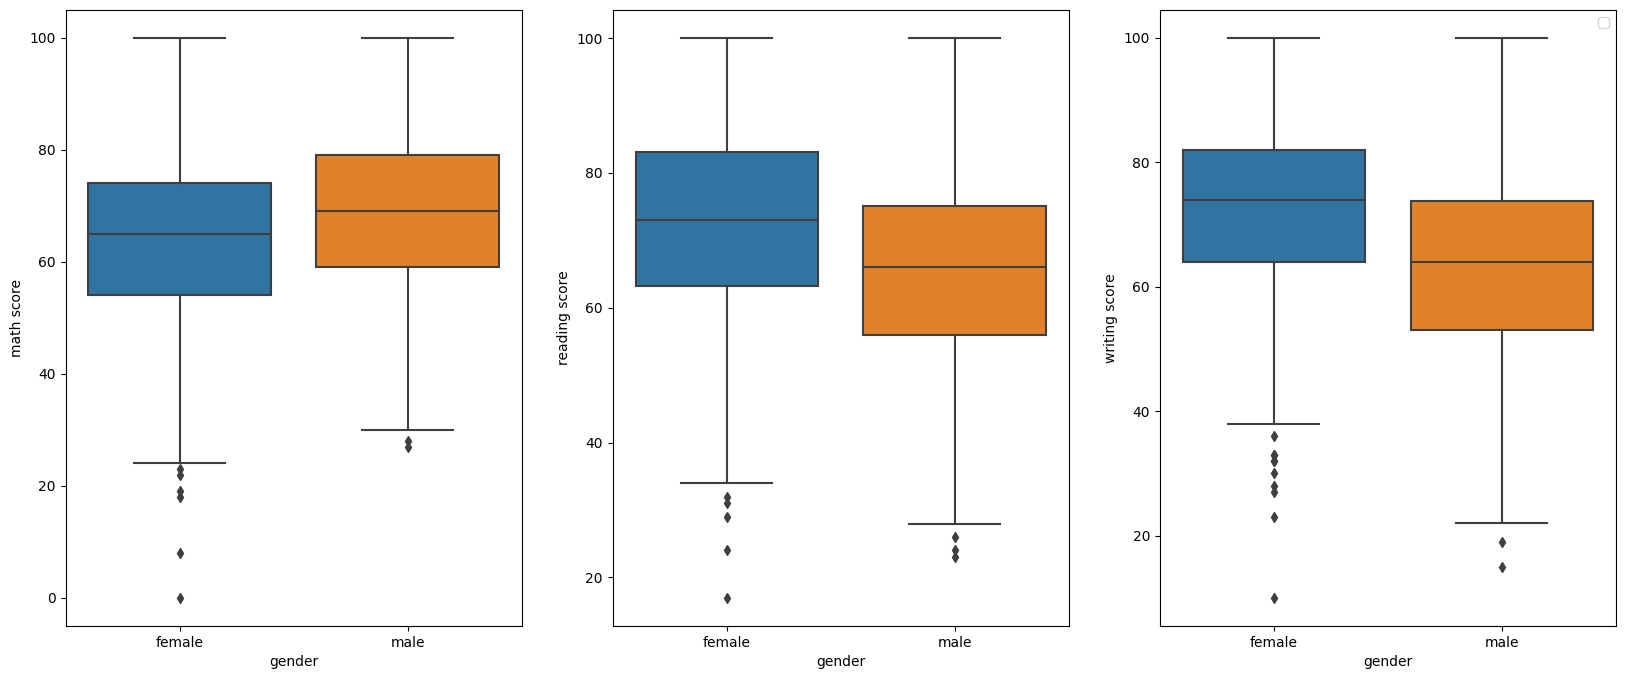

In [27]:
plt.figure(figsize = (20,8))
plt.subplot(131)
sns.boxplot(data = df, y =  'math score', x = 'gender')

plt.subplot(132)
sns.boxplot(data = df, y = 'reading score', x = 'gender')

plt.subplot(133)
sns.boxplot(data = df, y = 'writing score', x = 'gender')

plt.legend()

### Insight:
1. However the avearage or total marks of females are better than males but males are performing better than females in the toughest subject which needs more intelligence.


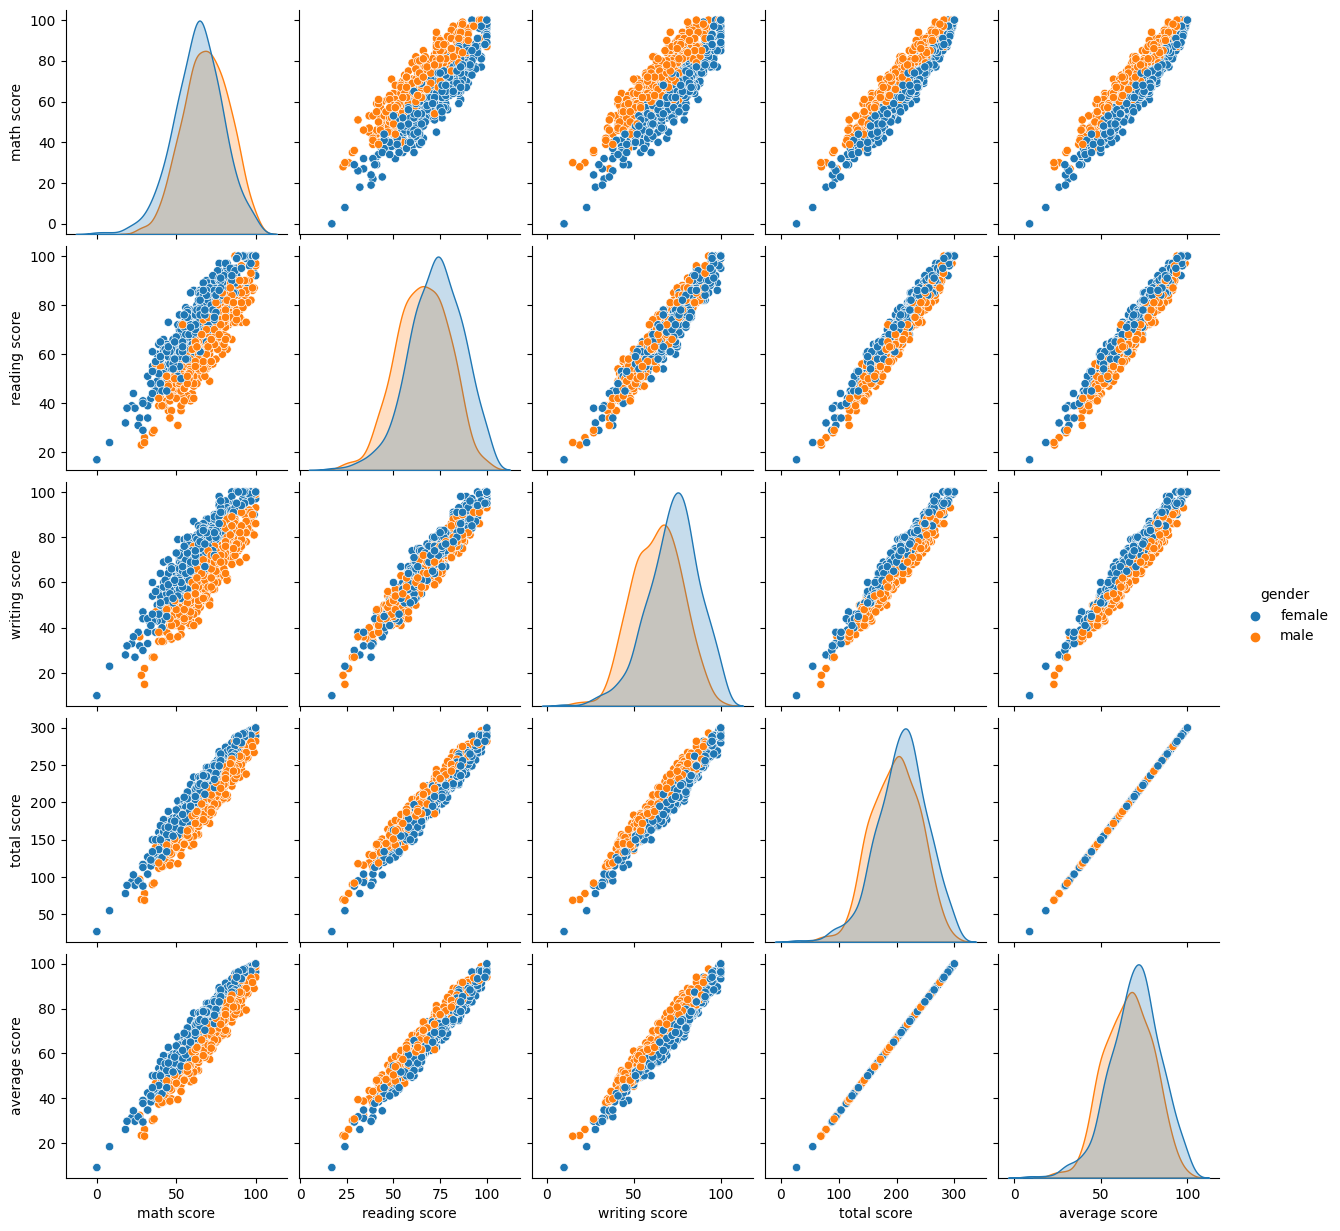

In [28]:
sns.pairplot(data = df, hue = 'gender')

### Insights
1. There is very sharp positive correlation between each of these numeric columns.
2. Their are small number of outliers.

In [29]:
df.corr()

,math score,reading score,writing score,total score,average score
math score,1.000000,0.817580,0.802642,0.918746,0.918744
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965669
total score,0.918746,0.970331,0.965667,1.000000,1.000000
average score,0.918744,0.970331,0.965669,1.000000,1.000000


<AxesSubplot: >

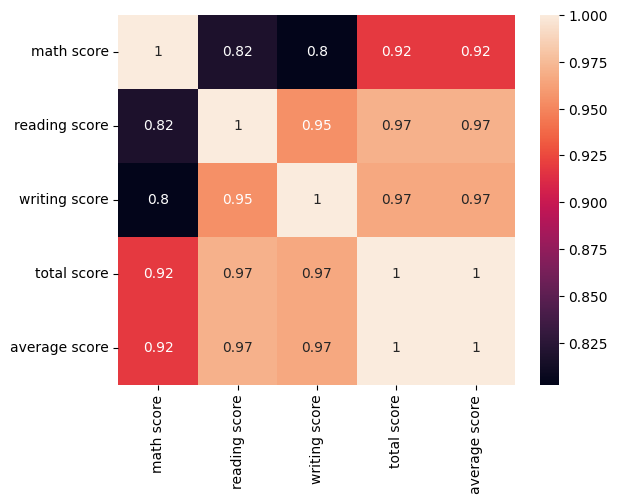

In [30]:
sns.heatmap(df.corr(), annot = True)

In [31]:
px.box(df, x = 'test preparation course', y = 'average score', color = 'lunch')

### Insights
Having standard lunch is creating a big impact on the scores.

In [32]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score'],
      dtype='object')

<AxesSubplot: xlabel='race/ethnicity', ylabel='count'>

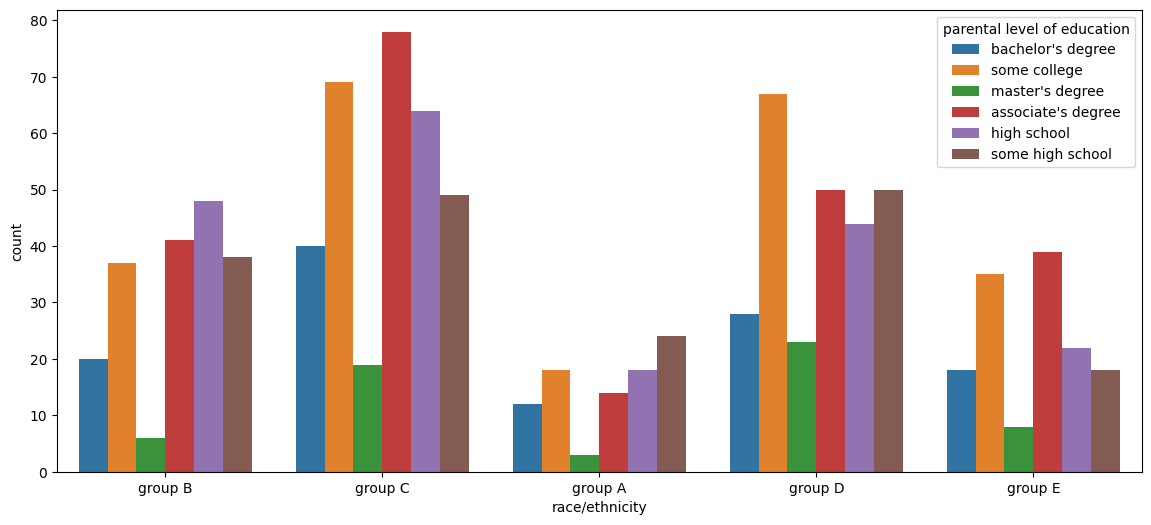

In [33]:
plt.figure(figsize = (14,6))
sns.countplot(data = df, x = 'race/ethnicity', hue ='parental level of education' )

In [34]:
px.histogram(df, x = 'race/ethnicity', color ='parental level of education')

Most people in the data sample fall in group C and least in group A. Also Master degree completion number is very low in the sample data.

### Adding column Pass/Fail for visualization purpose

In [35]:
df['status'] = np.where(df['math score']<36, 'fail',
                        np.where(df['reading score']<36,'fail',
                                 np.where(df['writing score']<36,'fail','pass')))

In [36]:
px.histogram(df[df['status']=='fail'], x = 'race/ethnicity', color ='parental level of education')

### Insight
1. Their is no student whose parents have done masters degree have failed.
2. Parents education have an impact on child's performance

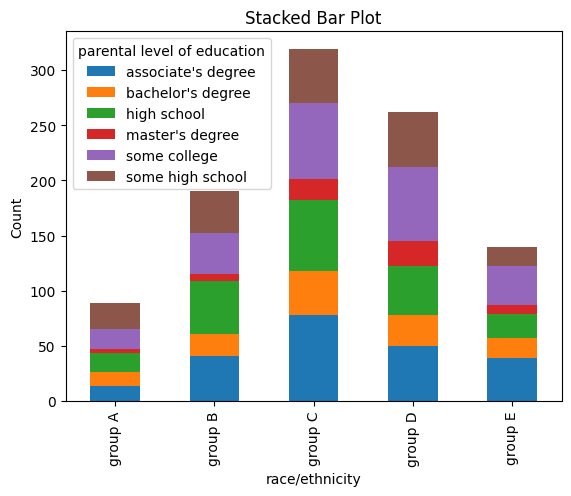

In [37]:
cross_tab = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('race/ethnicity')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')
plt.show()

<AxesSubplot: xlabel='parental level of education', ylabel='race/ethnicity'>

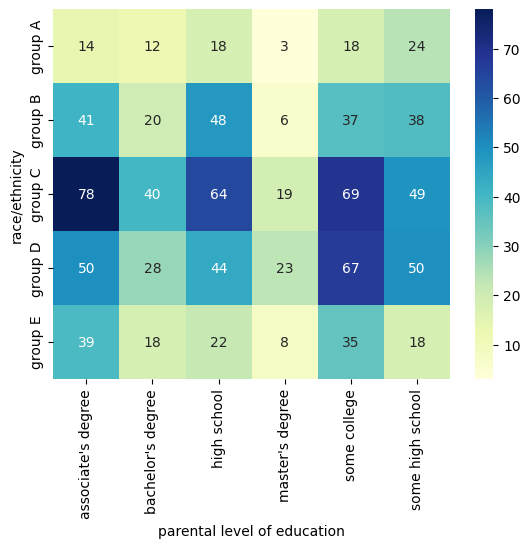

In [38]:
cross_tab = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')

### Insights
From the above plot we can sense that their is some relation between eductation and ethinicity.

#### Important:
* The size of the data is small and not reliable from prediction but still the distribution and pattern of the data is insightful and intutive. 